In [62]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from pathlib import Path

In [65]:
# create engine to hawaii.sqlite
database_path = Path("../Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{database_path}")

In [66]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [67]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [68]:
# Save references to each table
Station = Base.classes.station
Measurment = Base.classes.measurement

In [69]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [70]:
from sqlalchemy import inspect

In [71]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [72]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [73]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [74]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurment.date).order_by(Measurment.date.desc()).first()
most_recent_date

('2017-08-23',)

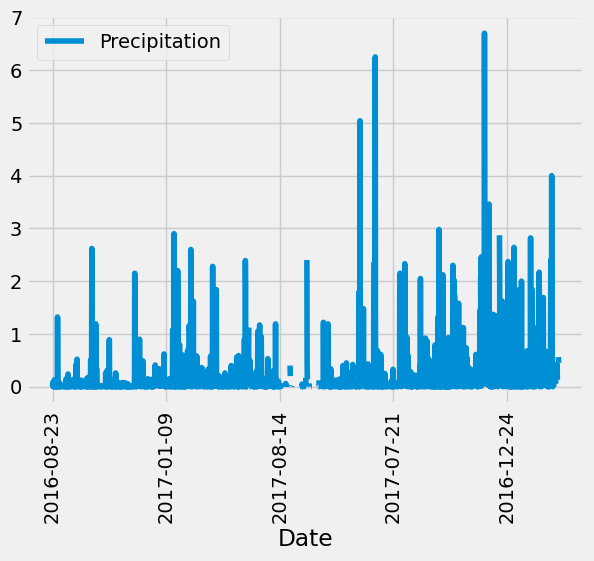

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation_data = session.query()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurment.date, Measurment.prcp).filter(Measurment.date >= year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df= pd.DataFrame(precipitation_data, columns=["Date","Precipitation"])
precipitation_df= precipitation_df.set_index("Date")

# Sort the dataframe by date
precipitation_df.sort_values(by="Date",ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xticks(rotation=90)
plt.show()


In [76]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats=precipitation_df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(Measurment.station, func.count(Measurment.date)).\
                        group_by(Measurment.station).\
                        order_by(func.count(Measurment.date).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp=session.query(func.min(Measurment.tobs)).\
filter(Measurment.station == 'USC00519281').all()

highest_temp=session.query(func.max(Measurment.tobs)).\
filter(Measurment.station == 'USC00519281').all()

avg_temp=session.query(func.avg(Measurment.tobs)).\
filter(Measurment.station == 'USC00519281').all()

print(lowest_temp,highest_temp,avg_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


<Axes: ylabel='Frequency'>

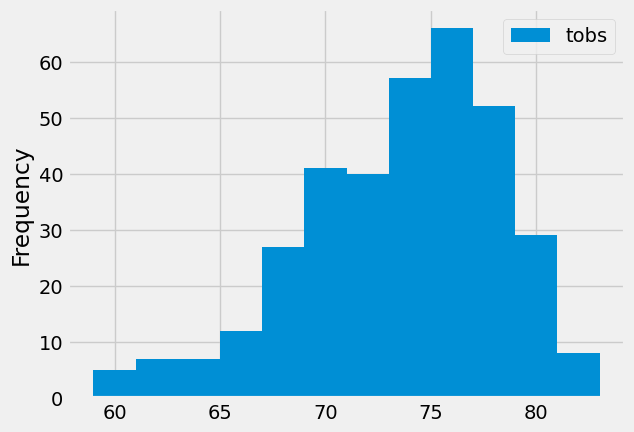

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

twelve_month_data = session.query(Measurment.date,Measurment.tobs).\
                    filter(Measurment.station == 'USC00519281').\
                    filter(Measurment.date > year_ago).all()
twelve_month_data_df=pd.DataFrame(twelve_month_data)
twelve_month_data_df.plot.hist(bins=12)


# Close Session

In [61]:
# Close Session
session.close()